In [1]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Mutators
from pyevolve import Statistics
from pyevolve import Crossovers
from pyevolve import Consts
from geopy.distance import geodesic
import matplotlib.pyplot as plt 
import random

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
cities = list(zip(LAT, LON))

In [4]:
def distanceTwoCities(city1, city2):
    return geodesic(city1, city2).km

In [5]:
def distTotPath(listCities):
    distance = 0.0
    for i in range(0,len(listCities)-1):
        distance += distanceTwoCities(cities[listCities[i]],cities[listCities[i+1]])
    distance += distanceTwoCities(cities[listCities[0]],cities[listCities[len(listCities)-1]])
    return distance

In [6]:
def fitness(chromosome):
    return distTotPath(chromosome)

In [7]:
def G1DListCustomInitializator(genome, **args):
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)
    genome.setInternalList(lst)

In [8]:
genome = G1DList.G1DList(len(cities))
genome.setParams(rangemin=0, rangemax=len(cities))
genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverEdge)
genome.initializator.set(G1DListCustomInitializator)

ga = GSimpleGA.GSimpleGA(genome)
ga.selector.set(Selectors.GTournamentSelector)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setGenerations(200)
ga.setCrossoverRate(0.8)
ga.setMutationRate(0.01)
ga.setPopulationSize(100)
ga.setElitism(True)

ga.evolve(freq_stats=50)

best = ga.bestIndividual()

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [8092.19(8278.73)/5045.12(4810.22)/6743.49(6743.49)]
Gen. 50 (25.00%): Max/Min/Avg Fitness(Raw)             [6283.22(6728.04)/4093.53(3608.23)/5236.01(5236.01)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw)             [6197.94(7400.23)/4324.71(3346.76)/5164.95(5164.95)]
Gen. 150 (75.00%): Max/Min/Avg Fitness(Raw)             [5640.78(6702.90)/4064.95(3346.76)/4700.65(4700.65)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw)             [6046.73(6538.39)/3901.61(3346.76)/5038.95(5038.95)]
Total time elapsed: 45.588 seconds.


3346.761974038629


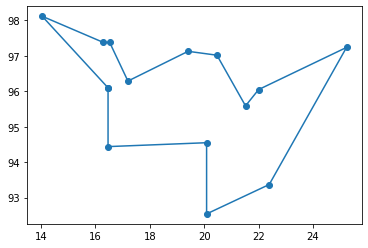

In [9]:
sol = best.genomeList
print(fitness(sol))
sol.append(sol[0])
sol_coords = []
sol_lat = []
sol_long = []

for i in range(0,len(sol)):
    sol_coords.append(cities[sol[i]])
    sol_lat.append(LAT[sol[i]])
    sol_long.append(LON[sol[i]])

plt.plot(sol_lat,sol_long, '-o')
plt.show()